**Install Libraries**

In [ ]:
#Run the below commands to install tabula and pygwalker
#!pip install tabula-py
#!pip install pygwalker -q

**Import Libraries**

In [ ]:
#importing important libraries for the project
import pandas as pd
import tabula as tb
import matplotlib.pyplot as plt
import pygwalker as pyg

ModuleNotFoundError: No module named 'tabula'

**Task 1: Loan Data Automation**

The loan data from PDF file can be extracted by using the following code snippet.As there is one loan table in the PDF file with multiple pages and the table has headers only on the first page. Therefore, the extracted data(from different pages of file) has been combined as follows.

In [ ]:
# Import PDF File
pdf_file_path = 'PDA - Loans_Database_Table.pdf'

# creating a PDF reader object
# Read tables from all pages into a list of DataFrames by using tabula
tables = tb.read_pdf(pdf_file_path, pages='all', multiple_tables=True)

# Check if any tables were found
if not tables:
    print("No tables found in the PDF.")
else:
   # Read table that is available on multiple pages of a PDF File
    # Extract the header from the first page
    header = tables[0]
    # Initialize an empty list to store modified tables
    combined_tables = []
    # Iterate through the remaining tables and prepend the header
    for table in tables[1:]:
        if not table.empty:
            table.columns = header.columns
            combined_tables.append(table)

    # Combine all tables into a single DataFrame
    loan_df_from_pdf = pd.concat([header] + combined_tables, ignore_index=True)

    # Now, 'loan_df_from_pdf' contains all tables from all pages of the PDF in a single DataFrame
    print("Combined PDF DataFrame:")
    print(loan_df_from_pdf)

Combined PDF DataFrame:
     Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0       1002       1        0           0         1              0   
1       1003       1        1           1         1              0   
2       1005       1        1           0         1              1   
3       1006       1        1           0         0              0   
4       1008       1        0           0         1              0   
..       ...     ...      ...         ...       ...            ...   
380     2265       1        1           2         0              0   
381     2266       1        1           2         1              0   
382     2272       1        1           2         1              0   
383     2277       2        0           0         1              0   
384     2281       1        1           0         1              0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         128           

The loan data from Excel file can be extracted by using the following code snippet.

In [ ]:
#load data from excel file using pandas
excel_file_path= 'PDA - Zappy Loan Data.xlsx'
excel_sheet_name='Sheet1' #replace with the actual sheet name containing data
loan_df_from_excel= pd.read_excel(excel_file_path, sheet_name=excel_sheet_name)
print(" Excel DataFrame:")
loan_df_from_excel


NameError: name 'pd' is not defined

**Mapping the Labels to the Values in Columns**

1.   List item
2.   List item



In [ ]:
#convert numeric values to their corresponding labels
mapping = {
    'Gender' : {1: 'Male', 2: 'Female'},
    'Married' : {0 : 'Single', 1 : 'Married'},
    'Dependents' : {0: '0', 1 : '1', 2 : '2', 3: '3'},
    'Graduate' : {0: 'No', 1 : 'Yes'},
    'Self_Employed' : {0: 'No', 1 : 'Yes'},
    'Credit_History' : {0: 'No', 1 : 'Yes'},
    'Property_Area' : {1: 'Urban', 2 : 'Semiurban', 3 : 'Rural'},
}

for column, col_mapping in mapping.items():
  if column in loan_df_from_pdf:
   loan_df_from_pdf[column] = loan_df_from_pdf[column].map(col_mapping)
   #if column in loan_df_from_excel:
  loan_df_from_excel[column] = loan_df_from_excel[column].map(col_mapping)

**Loan DataFrame from PDF:**

In [ ]:
# PRINT the extrcted dataframes
print("Loan DataFrame from PDF:")
loan_df_from_pdf

Loan DataFrame from PDF:


Loan_ID  Gender  Married Dependents Graduate Self_Employed  \
0       1002    Male   Single          0      Yes            No   
1       1003    Male  Married          1      Yes            No   
2       1005    Male  Married          0      Yes           Yes   
3       1006    Male  Married          0       No            No   
4       1008    Male   Single          0      Yes            No   
..       ...     ...      ...        ...      ...           ...   
380     2265    Male  Married          2       No            No   
381     2266    Male  Married          2      Yes            No   
382     2272    Male  Married          2      Yes            No   
383     2277  Female   Single          0      Yes            No   
384     2281    Male  Married          0      Yes            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         128               360   
1               4583             1508.0         128               360   
2               3000                0.0          66               360   
3               2583             2358.0         120               360   
4               6000                0.0         141               360   
..               ...                ...         ...               ...   
380             1993             1625.0         113               180   
381             3100             1400.0         113               360   
382             3276              484.0         135               360   
383             3180                0.0          71               360   
384             3033             1459.0          95               360   

    Credit_History Property_Area Loan_Status  
0              Yes         Urban           Y  
1              Yes         Rural           N  
2              Yes         Urban           Y  
3              Yes         Urban           Y  
4              Yes         Urban           Y  
..             ...           ...         ...  
380            Yes     Semiurban           Y  
381            Yes         Urban           Y  
382             No     Semiurban           Y  
383             No         Urban           N  
384            Yes         Urban           Y  

[385 rows x 13 columns]

**Loan DataFrame from Excel:**

In [ ]:
# PRINT the extracted dataframes
print("\nLoan DataFrame from Excel:")
loan_df_from_excel


Loan DataFrame from excel:


Loan_ID  Gender  Married Dependents Graduate Self_Employed  \
0       2284    Male   Single          0       No            No   
1       2287  Female   Single          0      Yes            No   
2       2288    Male  Married          2       No            No   
3       2296    Male   Single          0       No            No   
4       2297    Male   Single          0      Yes            No   
..       ...     ...      ...        ...      ...           ...   
242     2978  Female   Single          0      Yes            No   
243     2979    Male  Married          3      Yes            No   
244     2983    Male  Married          1      Yes            No   
245     2984    Male  Married          2      Yes            No   
246     2990  Female   Single          0      Yes           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               3902             1666.0         109               333   
1               1500             1800.0         103               333   
2               2889                0.0          45               180   
3               2755                0.0          65               300   
4               2500            20000.0         103               333   
..               ...                ...         ...               ...   
242             2900                0.0          71               333   
243             4106                0.0          40               180   
244             8072              240.0         253               333   
245             7583                0.0         187               333   
246             4583                0.0         133               333   

    Credit_History Property_Area Loan_Status  
0              Yes         Rural           Y  
1               No     Semiurban           N  
2               No         Urban           N  
3              Yes         Rural           N  
4              Yes     Semiurban           Y  
..             ...           ...         ...  
242            Yes         Rural           Y  
243            Yes         Rural           Y  
244            Yes         Urban           Y  
245            Yes         Urban           Y  
246             No     Semiurban           N  

[247 rows x 13 columns]

**Combining Datasets**

The data taken from different formats of files has been combined by using the pd.concat function as below:

In [ ]:
loan_df = pd.concat([loan_df_from_pdf, loan_df_from_excel], ignore_index=True)
loan_df


Loan_ID  Gender  Married Dependents Graduate Self_Employed  \
0       1002    Male   Single          0      Yes            No   
1       1003    Male  Married          1      Yes            No   
2       1005    Male  Married          0      Yes           Yes   
3       1006    Male  Married          0       No            No   
4       1008    Male   Single          0      Yes            No   
..       ...     ...      ...        ...      ...           ...   
627     2978  Female   Single          0      Yes            No   
628     2979    Male  Married          3      Yes            No   
629     2983    Male  Married          1      Yes            No   
630     2984    Male  Married          2      Yes            No   
631     2990  Female   Single          0      Yes           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         128               360   
1               4583             1508.0         128               360   
2               3000                0.0          66               360   
3               2583             2358.0         120               360   
4               6000                0.0         141               360   
..               ...                ...         ...               ...   
627             2900                0.0          71               333   
628             4106                0.0          40               180   
629             8072              240.0         253               333   
630             7583                0.0         187               333   
631             4583                0.0         133               333   

    Credit_History Property_Area Loan_Status  
0              Yes         Urban           Y  
1              Yes         Rural           N  
2              Yes         Urban           Y  
3              Yes         Urban           Y  
4              Yes         Urban           Y  
..             ...           ...         ...  
627            Yes         Rural           Y  
628            Yes         Rural           Y  
629            Yes         Urban           Y  
630            Yes         Urban           Y  
631             No     Semiurban           N  

[632 rows x 13 columns]

**Task 2 - Descyptive Analysis**

**Loan_ID column Indexing**

In [ ]:
# To ensure that loan data is correctly indexed on the Loan_ID column
loan_df.set_index('Loan_ID', inplace=True)
print("Combined Excel and PDF DataFrame:")
print(loan_df)

Combined Excel and PDF DataFrame:
         Gender  Married Dependents Graduate Self_Employed  ApplicantIncome  \
Loan_ID                                                                       
1002       Male   Single          0      Yes            No             5849   
1003       Male  Married          1      Yes            No             4583   
1005       Male  Married          0      Yes           Yes             3000   
1006       Male  Married          0       No            No             2583   
1008       Male   Single          0      Yes            No             6000   
...         ...      ...        ...      ...           ...              ...   
2978     Female   Single          0      Yes            No             2900   
2979       Male  Married          3      Yes            No             4106   
2983       Male  Married          1      Yes            No             8072   
2984       Male  Married          2      Yes            No             7583   
2990     Female   

**Handling Missing Values**

In [ ]:
loan_df.isna().sum()

Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

The loan_df dataframe is first inspected for missing values using the isna().sum() function. After this verfication, the records containing missing data can be dropped using the dropna() function.

In [ ]:
# Data cleaning and preparation

loan_df=loan_df.dropna()
loan_df

Gender  Married Dependents Graduate Self_Employed  ApplicantIncome  \
Loan_ID                                                                       
1002       Male   Single          0      Yes            No             5849   
1003       Male  Married          1      Yes            No             4583   
1005       Male  Married          0      Yes           Yes             3000   
1006       Male  Married          0       No            No             2583   
1008       Male   Single          0      Yes            No             6000   
...         ...      ...        ...      ...           ...              ...   
2978     Female   Single          0      Yes            No             2900   
2979       Male  Married          3      Yes            No             4106   
2983       Male  Married          1      Yes            No             8072   
2984       Male  Married          2      Yes            No             7583   
2990     Female   Single          0      Yes           Yes             4583   

         CoapplicantIncome  LoanAmount  Loan_Amount_Term Credit_History  \
Loan_ID                                                                   
1002                   0.0         128               360            Yes   
1003                1508.0         128               360            Yes   
1005                   0.0          66               360            Yes   
1006                2358.0         120               360            Yes   
1008                   0.0         141               360            Yes   
...                    ...         ...               ...            ...   
2978                   0.0          71               333            Yes   
2979                   0.0          40               180            Yes   
2983                 240.0         253               333            Yes   
2984                   0.0         187               333            Yes   
2990                   0.0         133               333             No   

        Property_Area Loan_Status  
Loan_ID                            
1002            Urban           Y  
1003            Rural           N  
1005            Urban           Y  
1006            Urban           Y  
1008            Urban           Y  
...               ...         ...  
2978            Rural           Y  
2979            Rural           Y  
2983            Urban           Y  
2984            Urban           Y  
2990        Semiurban           N  

[632 rows x 12 columns]

In [ ]:
loan_df.isna().sum()

Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#filling missing values
#loan_df=loan_df.fillna(0)
#loan_df



```
# This is formatted as code
```

**Duplicate Values**

Firstly, the duplicated rows have been identified. Afterwards, different methods have been used to drop the duplicate occurances.

In [ ]:
# Duplicate rows in data frame
duplicate_rows = loan_df[loan_df.duplicated()]

# Display the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

# drop duplicates and keep the first occurance only (default behavior)
loan_df_deduplicated =  loan_df.drop_duplicates()

# drop duplicates and keep the last occurance
loan_df_deduplicated_last = loan_df.drop_duplicates(keep='last')

# drop duplicates based on specific columns
columns_to_check = ['ApplicantIncome', 'LoanAmount']
loan_df_deduplicated_custom = loan_df.drop_duplicates(subset=columns_to_check)

#print the shape of the original and deduplicated dataframes
print("Original dataframe shape:", loan_df.shape)
print("dedupicated dataframe shape (first occurence):", loan_df_deduplicated.shape)
print("dedupicated dataframe shape (last occurence):", loan_df_deduplicated_last.shape)
print("dedupicated dataframe shape (custom subset):", loan_df_deduplicated_custom.shape)

Duplicate rows:
         Gender Married Dependents Graduate Self_Employed  ApplicantIncome  \
Loan_ID                                                                      
1925     Female  Single          0      Yes           Yes             2600   
1945     Female  Single          0      Yes            No             5417   
1955     Female  Single          0      Yes            No             5000   

         CoapplicantIncome  LoanAmount  Loan_Amount_Term Credit_History  \
Loan_ID                                                                   
1925                1717.0          99               300            Yes   
1945                   0.0         143               480             No   
1955                2541.0         151               480            Yes   

        Property_Area Loan_Status  
Loan_ID                            
1925        Semiurban           N  
1945            Urban           N  
1955            Rural           N  
Original dataframe shape: (632, 12)
d

***Remove ouliers**

The stats of the loan data fram has been checked by using the describe() function.

In [ ]:
#describe stats
loan_df_deduplicated.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       629.000000         629.000000  629.000000        629.000000
mean       5356.003180        1608.942321  148.300477        335.055644
std        6072.058804        2887.628897   86.565466         62.177487
min         150.000000           0.000000    9.000000         12.000000
25%        2833.000000           0.000000  101.000000        333.000000
50%        3812.000000        1229.000000  128.000000        360.000000
75%        5703.000000        2306.000000  168.000000        360.000000
max       81000.000000       41667.000000  700.000000        480.000000

After cleaning the data, the visualization is being performed by using the plot_boxplot function for ApplicantIGenderncome and CoapplicantIncome fields.

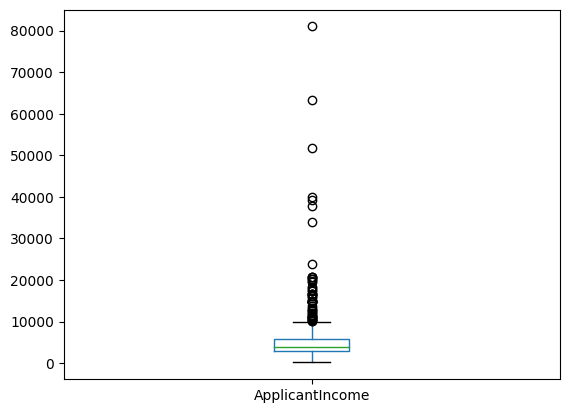

In [ ]:
# Visualize data using boxplot function
def plot_boxplot(df, ft):
   df.boxplot(column=[ft])
   plt.grid(False)
   plt.show()
plot_boxplot(loan_df_deduplicated, 'ApplicantIncome')

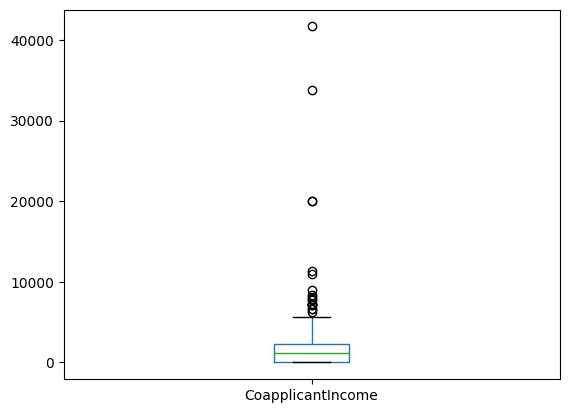

In [ ]:
plot_boxplot(loan_df_deduplicated, 'CoapplicantIncome')

In [ ]:
# remove outliers
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls



In [ ]:
# create an empty list to store output indices from multiple columns
index_list = []
for feature in ['ApplicantIncome', 'CoapplicantIncome']:
    index_list.extend(outliers(loan_df_deduplicated, feature))

In [ ]:
index_list

[1020,
 1100,
 1186,
 1233,
 1350,
 1369,
 1422,
 1448,
 1451,
 1469,
 1492,
 1516,
 1536,
 1585,
 1637,
 1640,
 1656,
 1673,
 1844,
 1859,
 1891,
 1907,
 1922,
 1996,
 2065,
 2101,
 2191,
 2194,
 1907,
 1922,
 2317,
 2364,
 2386,
 2393,
 2403,
 2422,
 2501,
 2527,
 2531,
 2541,
 2547,
 2582,
 2624,
 2634,
 2699,
 2729,
 2731,
 2795,
 2813,
 2855,
 2938,
 2959,
 1020,
 1028,
 1114,
 1431,
 1488,
 1610,
 1633,
 1843,
 2138,
 2201,
 2297,
 2342,
 2424,
 2624,
 2648,
 2693,
 2893,
 2949]

In [ ]:
# define a function called "remove" to clear the outliers from data frames
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

The dataframe shape has changed after removing the outliers as below:

In [ ]:
df_cleaned =  remove(loan_df_deduplicated, index_list)
df_cleaned.shape

(561, 12)

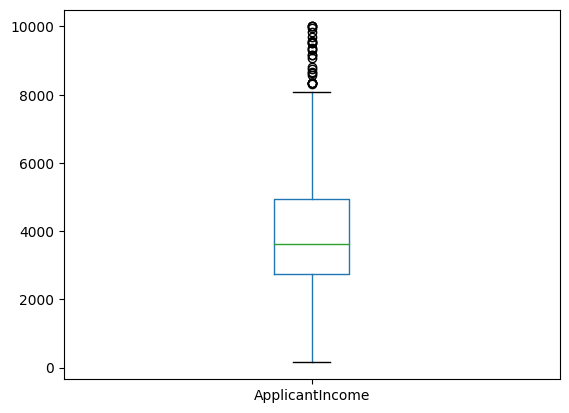

In [ ]:
plot_boxplot(df_cleaned, 'ApplicantIncome')

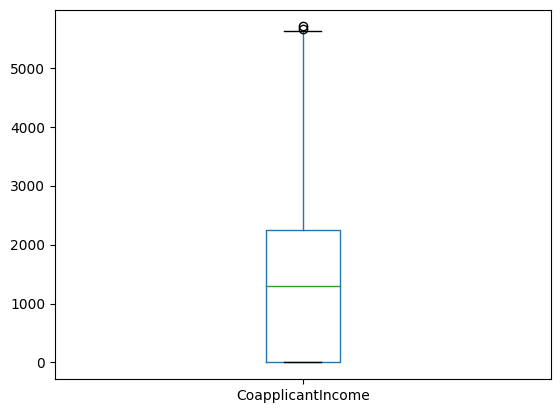

In [ ]:
plot_boxplot(df_cleaned, 'CoapplicantIncome')

**Exploratory Data Analysis (EDA)**

In [ ]:
#  The percentage of female applicants that had their loan approved
female_approved_percentage = (loan_df[loan_df['Gender'] == 'Female']['Loan_Status'] == 'Y').mean() * 100
print("Female approved percentage:", female_approved_percentage)

#  The average income of all applicants
average_income = loan_df['ApplicantIncome'].mean()
print("Average income:", average_income)

#  The average income of all applicants that are self-employed
average_income_self_employed = loan_df[loan_df['Self_Employed'] == 'Yes']['ApplicantIncome'].mean()
print("Average income self employed:", average_income_self_employed)

# The average income of all applicants that are not self-employed
average_income_not_self_employed = loan_df[loan_df['Self_Employed'] == 'No']['ApplicantIncome'].mean()
print("Average income not self employed:", average_income_not_self_employed)

# The average income of all graduate applicants
average_income_graduate = loan_df[loan_df['Graduate'] == 'Yes']['ApplicantIncome'].mean()
print("Average income graduate:", average_income_graduate)

# The percentage of graduate applicants that had their loan status approved
graduate_approved_percentage = (loan_df[loan_df['Graduate'] == 'Yes']['Loan_Status'] == 'Y').mean() * 100
print("Graduate approved percentage:", graduate_approved_percentage)


Female approved percentage: 66.38655462184873
Average income: 5351.175632911392
Average income self employed: 7284.285714285715
Average income not self employed: 5054.859489051095
Average income graduate: 5780.2997987927565
Graduate approved percentage: 70.82494969818913


**Visualization**

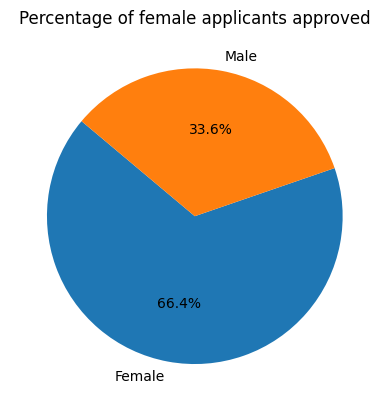

In [ ]:
#create visuals
#Female Approved Percentage
#Plot 1
labels = ['Female', 'Male']
sizes = [female_approved_percentage, 100 - female_approved_percentage]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of female applicants approved')
plt.show()

53.51175665855408
46.48824334144592


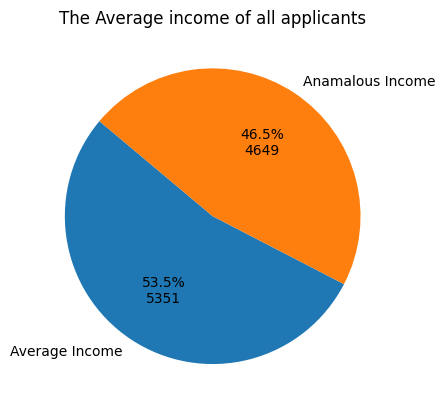

In [ ]:
#create visuals
#Average Income
# Plot 2
def your_autopct_format(prct_value):
    print(prct_value)
    return '{:.1f}%\n{:.0f}'.format(prct_value, prct_value*100)

labels = ['Average Income', 'Anamalous Income']
anamalous = 10000 - average_income
values = [average_income, anamalous]
#plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.pie(values, labels=labels, autopct=your_autopct_format, startangle=140)
plt.title('The Average income of all applicants')
plt.show()

59.03396010398865
40.96604287624359


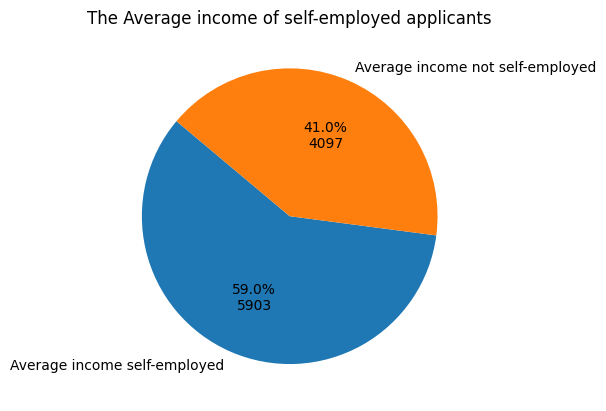

In [ ]:
#Plot 3
def your_autopct_format(avg_value):
    print(avg_value)
    return '{:.1f}%\n{:.0f}'.format(avg_value, avg_value*100)

labels = ['Average income self-employed', 'Average income not self-employed']
values = [average_income_self_employed, average_income_not_self_employed]
plt.pie(values, labels=labels, autopct=your_autopct_format, startangle=140)
plt.title('The Average income of self-employed applicants')
plt.show()

59.03396010398865
40.96604287624359


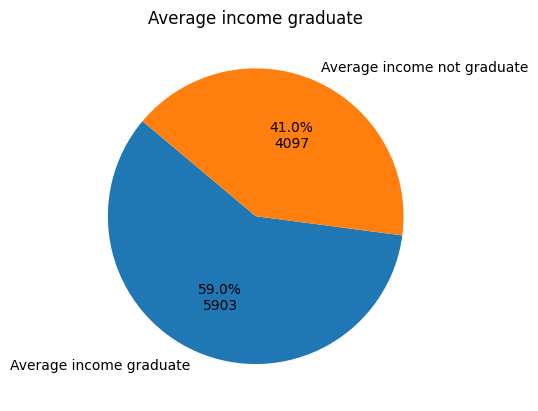

In [ ]:
#Plot 4
def your_autopct_format(avg_income):
    print(avg_income)
    return '{:.1f}%\n{:.0f}'.format(avg_income, avg_income*100)

labels = ['Average income graduate', 'Average income not graduate']
sizes = [average_income_graduate, 10000 - average_income_graduate]
plt.pie(values, labels=labels, autopct=your_autopct_format, startangle=140)
plt.title('Average income graduate')
plt.show()

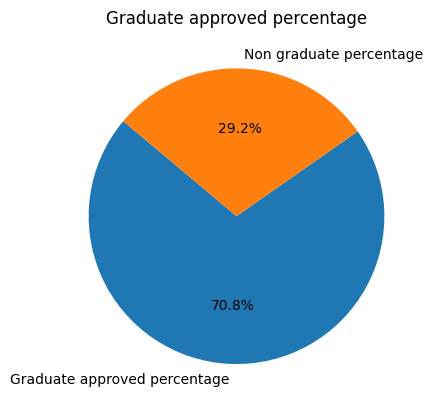

In [ ]:
#Plot 5
#graduate_approved_percentage

labels = ['Graduate approved percentage', 'Non graduate percentage']
sizes = [graduate_approved_percentage, 100 - graduate_approved_percentage]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Graduate approved percentage')
plt.show()

**Average Incomes by Category**

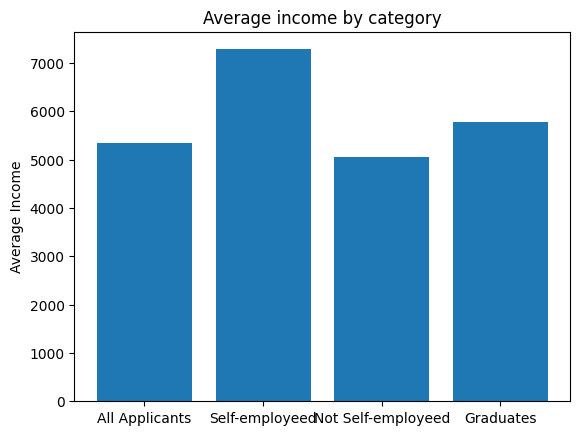

In [ ]:
average_incomes = [average_income, average_income_self_employed, average_income_not_self_employed, average_income_graduate]
categories = ['All Applicants', 'Self-employeed', 'Not Self-employeed', 'Graduates']
plt.bar(categories, average_incomes)
plt.ylabel('Average Income')
plt.title('Average income by category')
plt.show()

In [ ]:
print("\nLoan Dataframe from excel")
#loan_df_from_excel.head()
pyg.walk(loan_df_from_excel)


Loan Dataframe from excel


Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

In [ ]:
print("\nLoan Dataframe from PDF")
#loan_df_from_pdf.head()
pyg.walk(loan_df_from_pdf)


Loan Dataframe from PDF


Box(children=(HTML(value='<div id="ifr-pyg-1" style="height: auto">\n    <head>\n        <meta http-equiv="Con…